In [421]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns;
import matplotlib.pyplot as plt

In [422]:
df = pd.read_csv('anz_data.csv')
df.head(5)

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,1,1,Wednesday,7 days,52855.65
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7 days,52855.65
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7 days,52855.65
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,8,9,Wednesday,7 days,52855.65
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,18,19,Wednesday,7 days,52855.65


In [423]:
df.T.sort_index().T.columns

Index(['account', 'age', 'amount', 'annual_salary', 'balance', 'bin_age',
       'card_present_flag', 'customer_id', 'date', 'day', 'dow', 'first_name',
       'gender', 'hour', 'latitude', 'longitude', 'merchant_code',
       'merchant_id', 'merchant_latitude', 'merchant_longitude',
       'merchant_state', 'merchant_suburb', 'minute', 'month', 'movement',
       'payment_period', 'status', 'transaction_id', 'txn_description',
       'year'],
      dtype='object')

In [424]:
df.head()

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,1,1,Wednesday,7 days,52855.65
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7 days,52855.65
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7 days,52855.65
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,8,9,Wednesday,7 days,52855.65
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,18,19,Wednesday,7 days,52855.65


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             12043 non-null  object 
 1   age                 12043 non-null  int64  
 2   amount              12043 non-null  float64
 3   balance             12043 non-null  float64
 4   card_present_flag   7717 non-null   float64
 5   customer_id         12043 non-null  object 
 6   date                12043 non-null  object 
 7   first_name          12043 non-null  object 
 8   gender              12043 non-null  object 
 9   latitude            12043 non-null  float64
 10  longitude           12043 non-null  float64
 11  merchant_code       883 non-null    float64
 12  merchant_id         7717 non-null   object 
 13  merchant_latitude   7717 non-null   float64
 14  merchant_longitude  7717 non-null   float64
 15  merchant_state      7717 non-null   object 
 16  merc

In [426]:
df.describe()

,age,amount,balance,card_present_flag,latitude,longitude,merchant_code,merchant_latitude,merchant_longitude,year,month,day,hour,minute,annual_salary
count,12043.000000,12043.000000,12043.000000,7717.000000,12043.000000,12043.000000,883.0,7717.000000,7717.000000,12043.0,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,30.582330,187.933588,14704.195553,0.802644,-38.164347,143.648563,0.0,-32.752651,143.433277,2018.0,9.011957,15.862908,13.268621,19.009632,68652.099506
std,10.046343,592.599934,31503.722652,0.398029,54.622791,16.669352,0.0,5.282423,12.090074,0.0,0.816511,8.899598,5.777284,19.879112,24300.871846
min,18.000000,0.100000,0.240000,0.000000,-573.000000,114.620000,0.0,-43.310000,113.830000,2018.0,8.000000,1.000000,0.000000,0.000000,29874.641667
25%,22.000000,16.000000,3158.585000,1.000000,-37.700000,138.690000,0.0,-37.710000,144.680000,2018.0,8.000000,8.000000,9.000000,0.000000,51650.107000
50%,28.000000,29.000000,6432.010000,1.000000,-33.890000,145.230000,0.0,-33.840000,145.830000,2018.0,9.000000,16.000000,13.000000,13.000000,60493.536000
75%,38.000000,53.655000,12465.945000,1.000000,-30.750000,151.220000,0.0,-29.440000,151.210000,2018.0,10.000000,24.000000,18.000000,36.000000,81700.970000
max,78.000000,8835.980000,267128.520000,1.000000,-12.370000,255.000000,0.0,-12.330000,153.610000,2018.0,10.000000,31.000000,23.000000,59.000000,134946.236000


In [427]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,12043.0,30.582330,10.046343,18.000000,22.000,28.000,38.000,78.000
amount,12043.0,187.933588,592.599934,0.100000,16.000,29.000,53.655,8835.980
balance,12043.0,14704.195553,31503.722652,0.240000,3158.585,6432.010,12465.945,267128.520
card_present_flag,7717.0,0.802644,0.398029,0.000000,1.000,1.000,1.000,1.000
latitude,12043.0,-38.164347,54.622791,-573.000000,-37.700,-33.890,-30.750,-12.370
longitude,12043.0,143.648563,16.669352,114.620000,138.690,145.230,151.220,255.000
merchant_code,883.0,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000
merchant_latitude,7717.0,-32.752651,5.282423,-43.310000,-37.710,-33.840,-29.440,-12.330
merchant_longitude,7717.0,143.433277,12.090074,113.830000,144.680,145.830,151.210,153.610
year,12043.0,2018.000000,0.000000,2018.000000,2018.000,2018.000,2018.000,2018.000


In [428]:
print(df['txn_description'].value_counts())
mdf = dict(tuple(df.groupby('txn_description')))['PAY/SALARY']

txn_description
SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: count, dtype: int64


In [429]:
mdf

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
11160,ACC-588564840,23,3903.95,8342.11,NaN,CUS-1462656821,2018-08-01,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,8,1,11,0,Wednesday,14 days,101781.554000
11161,ACC-588564840,23,3903.95,10724.87,NaN,CUS-1462656821,2018-08-15,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,8,15,11,0,Wednesday,14 days,101781.554000
11162,ACC-588564840,23,3903.95,13030.74,NaN,CUS-1462656821,2018-08-29,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,8,29,11,0,Wednesday,14 days,101781.554000
11163,ACC-588564840,23,3903.95,15523.69,NaN,CUS-1462656821,2018-09-12,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,9,12,11,0,Wednesday,14 days,101781.554000
11164,ACC-588564840,23,3903.95,17906.31,NaN,CUS-1462656821,2018-09-26,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,9,26,11,0,Wednesday,14 days,101781.554000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,ACC-2153562714,24,3712.56,9707.77,NaN,CUS-423725039,2018-10-24,Linda,F,-31.88,...,PAY/SALARY,20-30,2018,10,24,14,0,Wednesday,30 days,45169.480000
12039,ACC-1217063613,27,4863.62,4863.86,NaN,CUS-1739931018,2018-09-26,Kimberly,F,-37.82,...,PAY/SALARY,20-30,2018,9,26,13,0,Wednesday,30 days,59174.043333
12040,ACC-1217063613,27,4863.62,8905.77,NaN,CUS-1739931018,2018-10-26,Kimberly,F,-37.82,...,PAY/SALARY,20-30,2018,10,26,13,0,Friday,30 days,59174.043333
12041,ACC-3100725361,25,6107.23,6111.57,NaN,CUS-2178051368,2018-09-26,Ronald,M,-17.03,...,PAY/SALARY,20-30,2018,9,26,15,0,Wednesday,30 days,74304.632000


In [430]:
# Debit Transactions
df_deb = df[df.movement=='debit']

# Credit Transactions (salary payments)
df_credit = df[df.movement == 'credit']

# Load the salary data
txn = dict(tuple(df.groupby('txn_description')))
txn.keys()

dict_keys(['INTER BANK', 'PAY/SALARY', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS'])

In [431]:
# Debit Transactions
df_deb = df[df.movement=='debit']

# Credit Transactions (salary payments)
df_credit = df[df.movement == 'credit']

# Load the salary data
txn = dict(tuple(df.groupby('txn_description')))
txn.keys()

dict_keys(['INTER BANK', 'PAY/SALARY', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS'])

In [432]:
txn['PAY/SALARY']

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
11160,ACC-588564840,23,3903.95,8342.11,NaN,CUS-1462656821,2018-08-01,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,8,1,11,0,Wednesday,14 days,101781.554000
11161,ACC-588564840,23,3903.95,10724.87,NaN,CUS-1462656821,2018-08-15,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,8,15,11,0,Wednesday,14 days,101781.554000
11162,ACC-588564840,23,3903.95,13030.74,NaN,CUS-1462656821,2018-08-29,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,8,29,11,0,Wednesday,14 days,101781.554000
11163,ACC-588564840,23,3903.95,15523.69,NaN,CUS-1462656821,2018-09-12,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,9,12,11,0,Wednesday,14 days,101781.554000
11164,ACC-588564840,23,3903.95,17906.31,NaN,CUS-1462656821,2018-09-26,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,9,26,11,0,Wednesday,14 days,101781.554000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,ACC-2153562714,24,3712.56,9707.77,NaN,CUS-423725039,2018-10-24,Linda,F,-31.88,...,PAY/SALARY,20-30,2018,10,24,14,0,Wednesday,30 days,45169.480000
12039,ACC-1217063613,27,4863.62,4863.86,NaN,CUS-1739931018,2018-09-26,Kimberly,F,-37.82,...,PAY/SALARY,20-30,2018,9,26,13,0,Wednesday,30 days,59174.043333
12040,ACC-1217063613,27,4863.62,8905.77,NaN,CUS-1739931018,2018-10-26,Kimberly,F,-37.82,...,PAY/SALARY,20-30,2018,10,26,13,0,Friday,30 days,59174.043333
12041,ACC-3100725361,25,6107.23,6111.57,NaN,CUS-2178051368,2018-09-26,Ronald,M,-17.03,...,PAY/SALARY,20-30,2018,9,26,15,0,Wednesday,30 days,74304.632000


In [433]:
def plot_hist(ldf,feature,title,orient='v',height=350):

    if(orient is 'h'):
        fig = px.histogram(ldf[feature],nbins=100,template='plotly_white',
                            marginal="box",
                           title=title,orientation='h',height=height)
    elif(orient is 'v'):
        fig = px.histogram(ldf[feature],nbins=100,template='plotly_white',
                           marginal="box",
                           title=title,orientation='v',height=height)
    
    fig.update_traces(marker_color='#15C3BA',marker_line_color="white")
    fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.25)
    fig.show('png',dpi=300)

<>:3: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

<>:7: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

<>:3: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

<>:7: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

/var/folders/v5/1jr8thwx00bfz2t6z_zkr3q80000gn/T/ipykernel_8601/784084965.py:3: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

/var/folders/v5/1jr8thwx00bfz2t6z_zkr3q80000gn/T/ipykernel_8601/784084965.py:7: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?



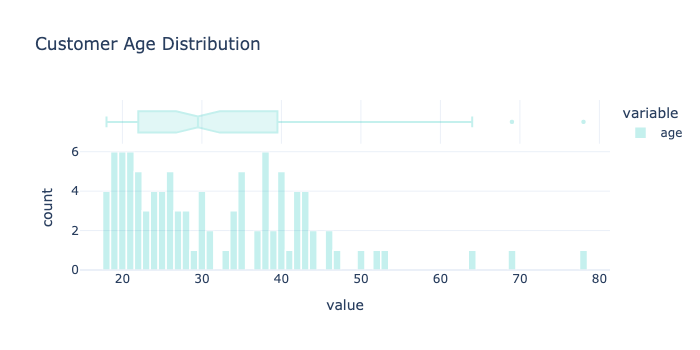

In [434]:
ldf = df.groupby('customer_id')['age'].mean().reset_index()

plot_hist(ldf,'age','Customer Age Distribution')

In [435]:
def plot_vcounts_groupby(ldf,gr_feature,feature,top=10,return_id=True,
                         orient='x',title=None,height=500):
    
    value_counts_s = ldf.groupby([gr_feature]).first()[feature].value_counts()
    value_counts_f = value_counts_s.to_frame()   
    
    if(top):
        value_counts = value_counts_f[:top]
    else:
        value_counts = value_counts_f
    
    if(orient is 'h'):
        fig = px.bar(value_counts,orientation='h',
                     height=height,template='plotly_white')
    elif(orient is 'v'):
        fig = px.bar(value_counts,orientation='v',
                     height=height,template='plotly_white')
        
    fig.update_traces(marker_color='#15C3BA', 
                      marker_line_color='white',
                      marker_line_width=1.5, opacity=1.0)
    fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.25)

    fig.show('svg',dpi=300,width=800)
    
    if(return_id):
        return value_counts_f

<>:12: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

<>:15: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

<>:12: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

<>:15: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

/var/folders/v5/1jr8thwx00bfz2t6z_zkr3q80000gn/T/ipykernel_8601/2945345043.py:12: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?

/var/folders/v5/1jr8thwx00bfz2t6z_zkr3q80000gn/T/ipykernel_8601/2945345043.py:15: SyntaxWarning:

"is" with 'str' literal. Did you mean "=="?



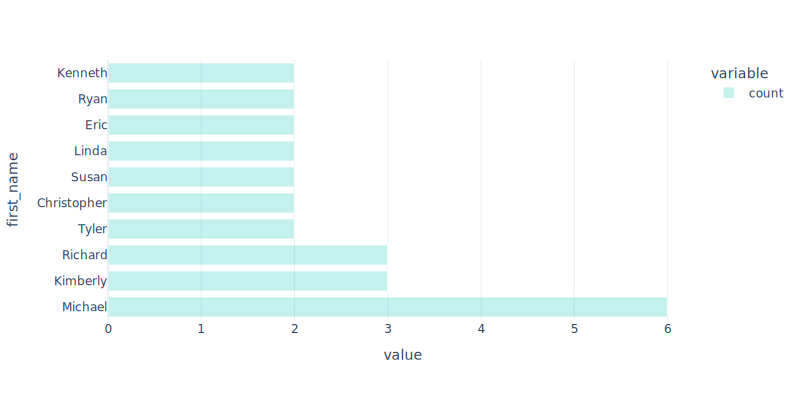

In [436]:
vc = plot_vcounts_groupby(df,'customer_id','first_name',orient='h',top=10,title='title',height=400)

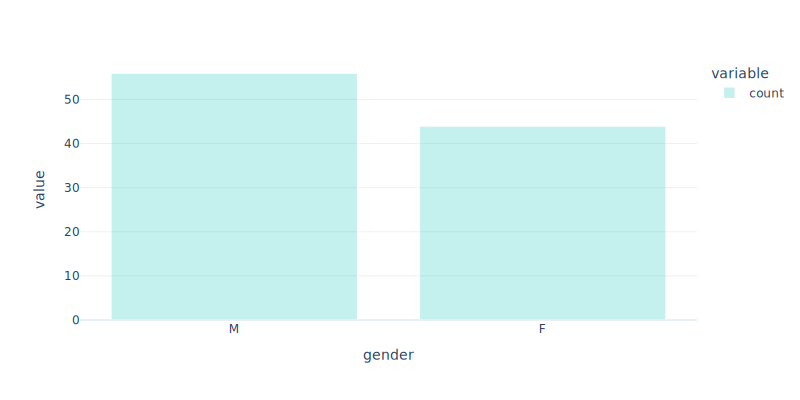

In [437]:
plot_vcounts_groupby(df,'customer_id','gender',
                     orient='v',title='title',height=400,return_id=False)

In [438]:

find_id = 0
for i in dict(tuple(df.groupby(['customer_id']))):
    n = dict(tuple(df.groupby(['customer_id'])))[i]['account'].value_counts().shape[0]
    if(n > 1):
        find_id = 1
        
if(find_id == 1):
    print('customer_id with multiple accounts found')
else:
    print('all customer_id have unique account')

all customer_id have unique account


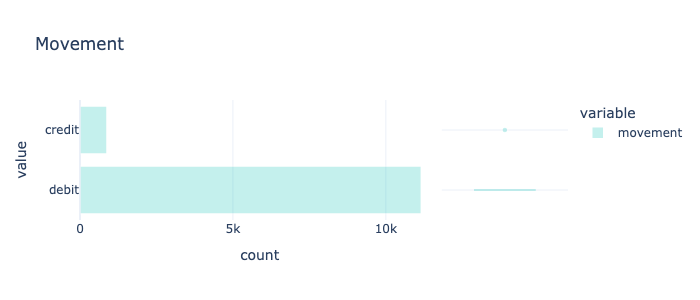

In [439]:
plot_hist(df,'movement',title='Movement',orient='h',height=300)

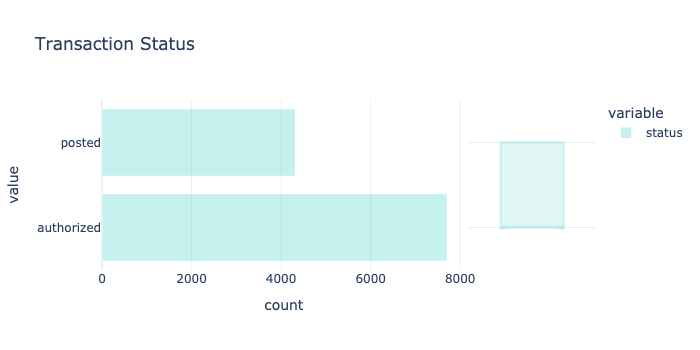

In [440]:
plot_hist(df,'status','Transaction Status',orient='h')

In [441]:
def plot_vcounts(ldf,feature,title,height=300):
    
    value_counts = ldf[feature].value_counts()
    value_counts = value_counts.to_frame()
    
    fig = px.bar(value_counts,height=height,
                 template='plotly_white')
    fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.25)
    fig.show('svg',dpi=300)

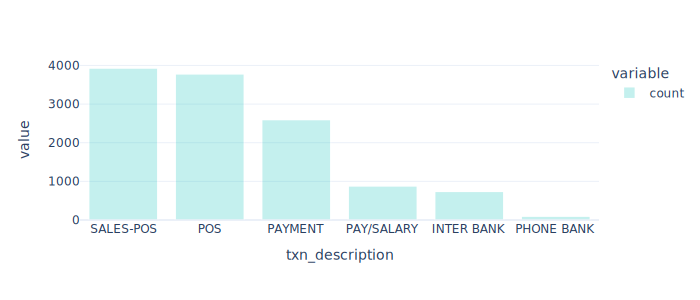

In [442]:
plot_vcounts(df,'txn_description','Transaction Status',height=300)

In [443]:
income_by_cus = df[df['movement'] == 'credit'] \
                  .groupby('customer_id')['amount'] \
                  .sum()/3

income_by_cus.describe()

count      100.000000
mean      5588.589500
std       2247.181239
min       2385.320000
25%       3863.777500
50%       4937.828333
75%       7110.838333
max      11781.306667
Name: amount, dtype: float64

In [444]:
print(len(income_by_cus.to_frame()[income_by_cus.to_frame()['amount']<5588]), 'customers earn below the mean value')

61 customers earn below the mean value


In [445]:
#Track debit transaction

In [446]:
df_deb2 = df_deb.groupby(['bin_age']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.bar(df_deb2,x='bin_age',y='amount',
             template='plotly_white',height=300)

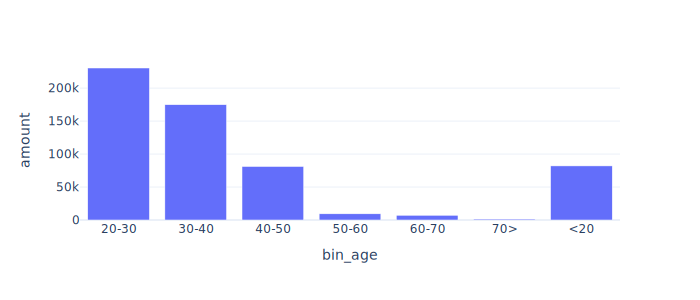

In [447]:
fig.show('svg',dpi=300)

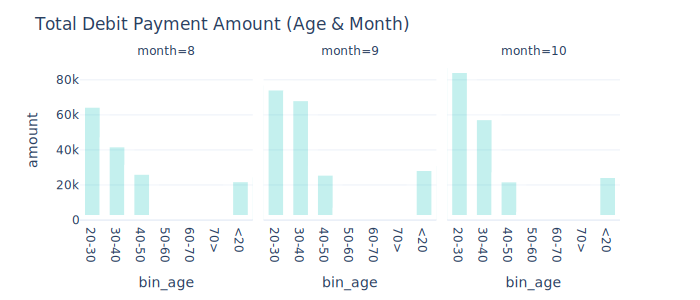

In [448]:
df_deb2 = df_deb.groupby(['month','bin_age']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.bar(df_deb2,x='bin_age',y='amount',template='plotly_white',
             facet_col='month',facet_col_wrap=3)

fig.update_traces(marker_color='#15C3BA',opacity=1.0,width=1)
fig.update_layout(title='Total Debit Payment Amount (Age & Month)',height=300)
fig.update_traces(marker_line_width = 10,selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25,width=1)

fig.show('svg',dpi=300)

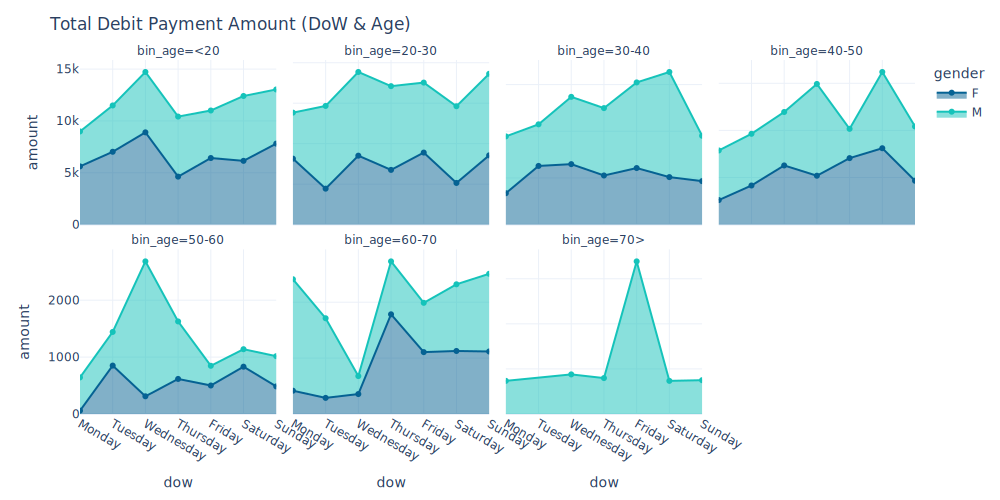

In [449]:
df_deb2 = df_deb.groupby(['dow','bin_age','gender']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.area(df_deb2,x='dow',y='amount',
              color='gender',
              template='plotly_white',
              markers=True,
              color_discrete_sequence=['#056293','#15C3BA'],
             facet_col='bin_age',facet_col_wrap=4,height=500,
             category_orders={'dow':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday'],
                             'bin_age':['<20','20-30','30-40','40-50','50-60',
                                       '60-70','70>']})

fig.update_layout(title='Total Debit Payment Amount (DoW & Age)')
fig.update_yaxes(matches=None)
fig.show('svg',dpi=300,height=500,width=1000)

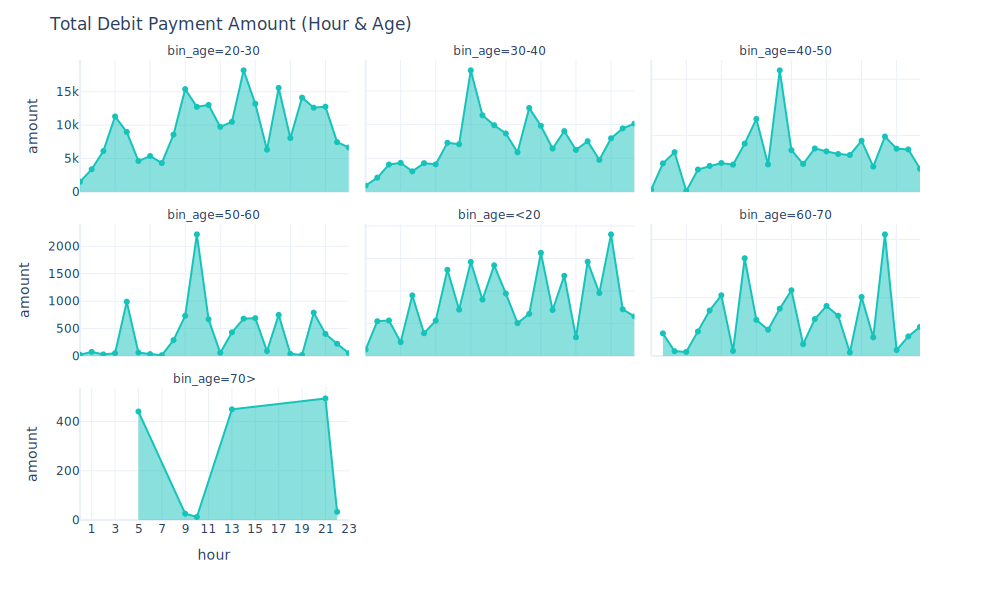

In [450]:
df_deb2 = df_deb.groupby(['hour','bin_age']).sum()['amount']
df_deb2 = df_deb2.reset_index()
df_deb2

fig = px.area(df_deb2,x='hour',y='amount',
             template='plotly_white',
             facet_col='bin_age',
              markers=True,
             facet_col_wrap=3,
             color_discrete_sequence=['#15C3BA'])

fig.update_traces(marker_color='#15C3BA',opacity=1.0)
fig.update_layout(title='Total Debit Payment Amount (Hour & Age)')
fig.update_xaxes(tickvals = [i for i in range(0,24,3)])
fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.update_yaxes(matches=None)

fig.update_traces(marker_line_width = 5,selector=dict(type="marker"))
fig.update_yaxes(matches=None)
fig.show('svg',dpi=500,height=600,width=1000)

In [451]:
# Debit Transactions
df_deb = df[df.movement=='debit']

# Credit Transactions (salary payments)
df_credit = df[df.movement == 'credit']

# Load the salary data
txn = dict(tuple(df.groupby('txn_description')))
txn.keys()

dict_keys(['INTER BANK', 'PAY/SALARY', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS'])

In [452]:
salary = txn['PAY/SALARY']

In [453]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883 entries, 11160 to 12042
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             883 non-null    object 
 1   age                 883 non-null    int64  
 2   amount              883 non-null    float64
 3   balance             883 non-null    float64
 4   card_present_flag   0 non-null      float64
 5   customer_id         883 non-null    object 
 6   date                883 non-null    object 
 7   first_name          883 non-null    object 
 8   gender              883 non-null    object 
 9   latitude            883 non-null    float64
 10  longitude           883 non-null    float64
 11  merchant_code       883 non-null    float64
 12  merchant_id         0 non-null      object 
 13  merchant_latitude   0 non-null      float64
 14  merchant_longitude  0 non-null      float64
 15  merchant_state      0 non-null      object 
 16  merchan

In [454]:
# get the payment period
salary['date'] = salary['date'].astype('datetime64[ns]')
salary['payment_period'] = salary.groupby('customer_id')['date'].diff(1)
salary['payment_period'] = salary['payment_period'].dropna()  # remove first rows
salary['payment_period'].value_counts()

payment_period
7 days     478
14 days    279
0 days       7
28 days      5
31 days      5
30 days      5
29 days      2
32 days      1
61 days      1
Name: count, dtype: int64

In [455]:
# change datatype to string from datetime
salary['payment_period_str'] = salary['payment_period'].astype('str')

# groupby customer_id
customer_salary = dict(tuple(salary.groupby('customer_id')))

# Let's find customers with non constant transaction periods of either 7/14 days

lst_abnormal = [] # list of customer_id w/ slightly abnormal (manual calculate needed)
dict_abnormal = {} # dictionary that will contain the abnormal payment groupby data

for id,data in customer_salary.items():

    values_to_remove = ['7 days','14 days','NaT']
    pattern = '|'.join(values_to_remove)

    result = data.loc[~data['payment_period_str'].str.contains(pattern, case=False)]
    if(result.shape[0]>0):
        lst_abnormal.append(id)  # store the key of the abnormal payment account
        dict_abnormal[id] = data # store the abnormal key/value account data

del salary['payment_period_str']

In [456]:
period_count = (salary[['customer_id','payment_period']]
                .drop_duplicates()
                .groupby(['customer_id'])
                .size()
                .reset_index(name='period count'))
                
period_count[period_count['period count']!=1]

# list of customer ids whose salary are calculated manually (found earlier)
strange_id = ['ACC-1683215619','ACC-1217063613','ACC-1523339231','ACC-354106658',
              'ACC-414431115','ACC-354106658','ACC-414431115','ACC-1056639002','ACC-2153562714',
              'ACC-211792489','ACC-2673069055','ACC-1903037542','ACC-2970114956','ACC-2270192619']
        
# include accounts which have non constant payment period
salary_normal_id = (salary[~salary['account']
                          .isin(strange_id)]
                          .groupby(['account'])
                          .nth(-1)
                          .reset_index())

# Find the annual salary -> amount / payment_period -> daily wage x 365 
salary_normal_id['annual_salary'] = round((salary_normal_id['amount'] / salary_normal_id['payment_period'].dt.days)*365, 3)
salary_normal_id.index = salary_normal_id['account']
del salary_normal_id['account']

# Show DataFrame of normal payment schedule customers
display(salary_normal_id.head())
print(f'Number of standard payment customers: {salary_normal_id.shape}')

,index,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
account,,,,,,,,,,,,,,,,,,,,,
ACC-588564840,11166,23,3903.95,24451.16,NaN,CUS-1462656821,2018-10-24,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,10,24,11,0,Wednesday,14 days,101781.554
ACC-1650504218,11180,23,1626.48,19580.32,NaN,CUS-2500783281,2018-10-31,Marissa,F,-37.93,...,PAY/SALARY,20-30,2018,10,31,12,0,Wednesday,7 days,84809.314
ACC-3326339947,11194,22,983.36,13962.29,NaN,CUS-326006476,2018-10-31,Eric,M,-33.80,...,PAY/SALARY,20-30,2018,10,31,12,0,Wednesday,7 days,51275.200
ACC-3541460373,11201,24,1408.08,5402.55,NaN,CUS-1433879684,2018-10-24,Jeffrey,M,-37.83,...,PAY/SALARY,20-30,2018,10,24,13,0,Wednesday,14 days,36710.657
ACC-2776252858,11215,43,1068.04,8859.42,NaN,CUS-4123612273,2018-10-31,Kristin,F,-37.76,...,PAY/SALARY,40-50,2018,10,31,13,0,Wednesday,7 days,55690.657


Number of standard payment customers: (88, 30)


In [457]:
# exclude accounts which have non constant payment period
salary_abnormal_id = (salary[salary['account']
                            .isin(strange_id)]
                            .groupby(['account'])
                            .nth(-1)
                            .reset_index())

salary_abnormal_id.index = salary_abnormal_id['account']
del salary_abnormal_id['account']

# manually calculate customer's annual salary
salary_abnormal_id.loc['ACC-1683215619','annual_salary'] = (5000/30)*365
salary_abnormal_id.loc['ACC-1056639002','annual_salary'] = (3195.01/14)*365 - 3195.01/2
salary_abnormal_id.loc['ACC-1217063613','annual_salary'] = (4863.62/30)*365
salary_abnormal_id.loc['ACC-1523339231','annual_salary'] = (8835.98/30)*365 + 8835.98
salary_abnormal_id.loc['ACC-1903037542','annual_salary'] = (1808.62/14)*365 + 1808.62/2
salary_abnormal_id.loc['ACC-211792489','annual_salary'] = (4910.9/60)*365
salary_abnormal_id.loc['ACC-2153562714','annual_salary'] = (3712.56/30)*365
salary_abnormal_id.loc['ACC-2673069055','annual_salary'] = (6024.49/30)*365
salary_abnormal_id.loc['ACC-2970114956','annual_salary'] = (1433.98/14)*365 - 1433.98/2
salary_abnormal_id.loc['ACC-354106658','annual_salary'] = ((5103.51*2)/30)*365 - 5103.51
salary_abnormal_id.loc['ACC-414431115','annual_salary'] = (1630.36/14)*365 - 1433.98
salary_abnormal_id.loc['ACC-2270192619','annual_salary'] = (3026.95/30)*365 + 3026.95

In [458]:
# check for incorrect values
print(f'inf values: {salary_abnormal_id.isin([np.inf, -np.inf]).sum().sum()}')

inf values: 0


In [459]:
df_annual_salary = pd.concat([salary_normal_id,salary_abnormal_id],axis=0)
df_annual_salary.head()

,index,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
account,,,,,,,,,,,,,,,,,,,,,
ACC-588564840,11166,23,3903.95,24451.16,NaN,CUS-1462656821,2018-10-24,Isaiah,M,-33.76,...,PAY/SALARY,20-30,2018,10,24,11,0,Wednesday,14 days,101781.554
ACC-1650504218,11180,23,1626.48,19580.32,NaN,CUS-2500783281,2018-10-31,Marissa,F,-37.93,...,PAY/SALARY,20-30,2018,10,31,12,0,Wednesday,7 days,84809.314
ACC-3326339947,11194,22,983.36,13962.29,NaN,CUS-326006476,2018-10-31,Eric,M,-33.80,...,PAY/SALARY,20-30,2018,10,31,12,0,Wednesday,7 days,51275.200
ACC-3541460373,11201,24,1408.08,5402.55,NaN,CUS-1433879684,2018-10-24,Jeffrey,M,-37.83,...,PAY/SALARY,20-30,2018,10,24,13,0,Wednesday,14 days,36710.657
ACC-2776252858,11215,43,1068.04,8859.42,NaN,CUS-4123612273,2018-10-31,Kristin,F,-37.76,...,PAY/SALARY,40-50,2018,10,31,13,0,Wednesday,7 days,55690.657


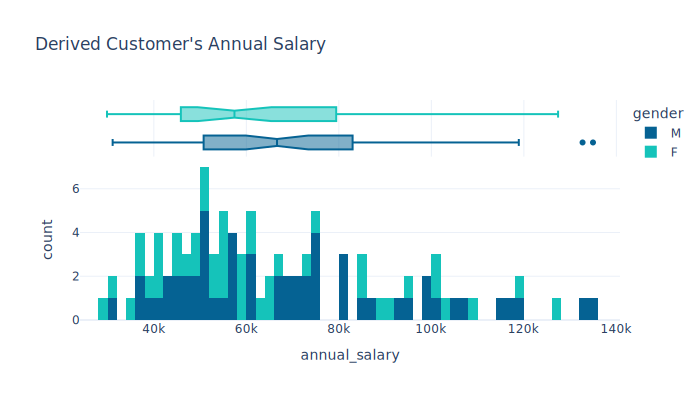

In [460]:
fig = px.histogram(df_annual_salary,
                   x='annual_salary',
                   template='plotly_white',
                   color='gender',
                   color_discrete_sequence=['#056293','#15C3BA'],
                   title='Annual Salary Data Distribution',
                   marginal="box",
                   nbins=100)

# fig.update_traces(marker_color='#15C3BA', 
#                   marker_line_color='white',
#                   marker_line_width=1.5,
#                   opacity=0.25)

fig.update_layout(title="Derived Customer's Annual Salary",height=400)

fig.show('svg',dpi=300)

In [461]:
df_annual_salary['annual_salary'].describe()

count       100.000000
mean      67264.614406
std       25179.797984
min       29874.641667
25%       48056.536107
50%       60163.732000
75%       82336.618500
max      134946.236000
Name: annual_salary, dtype: float64

In [462]:
df_annual_salary['annual_salary'].info()

<class 'pandas.core.series.Series'>
Index: 100 entries, ACC-588564840 to ACC-1217063613
Series name: annual_salary
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 1.6+ KB


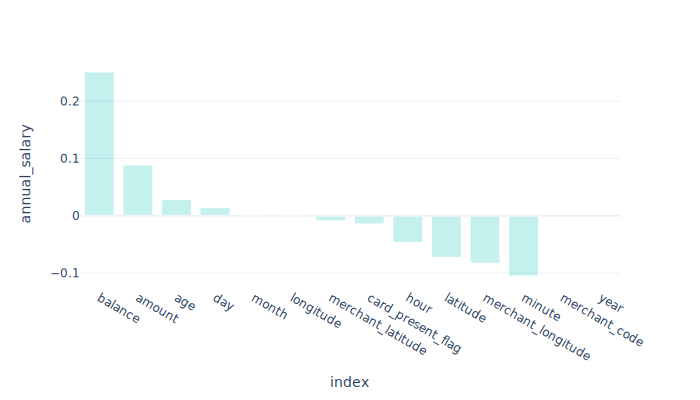

In [463]:
# Filter numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate correlation matrix with numeric columns
corr_matrix = df[numeric_cols].corr()

# Sort correlation with respect to 'annual_salary'
corr_target = corr_matrix['annual_salary'].sort_values(ascending=False).iloc[1:].to_frame()

# Plot the correlations using Plotly
import plotly.express as px

fig = px.bar(corr_target, y='annual_salary',
             template='plotly_white', height=400)
fig.update_traces(marker_line_width=2, selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA', opacity=0.25)
fig.show('svg', dpi=300)


In [464]:
# Selecting relevant features in df_annual_salary
keep_features = ['age', 'customer_id', 'first_name', 'gender', 'bin_age', 'payment_period', 'annual_salary']
df_annual_salary = df_annual_salary[keep_features]

# Assuming 'amount' column in salary needs to be numeric
salary['amount'] = pd.to_numeric(salary['amount'], errors='coerce')

# Grouping by 'account' and calculating mean of 'amount'
ldf = salary.groupby('account')['amount'].mean().reset_index()

# Merging ldf with df_annual_salary on 'account'
df_annual_salary = pd.merge(df_annual_salary, ldf, on='account', how='left')

# Displaying the resulting DataFrame
print(df_annual_salary)

           account  age     customer_id  first_name gender bin_age  \
0    ACC-588564840   23  CUS-1462656821      Isaiah      M   20-30   
1   ACC-1650504218   23  CUS-2500783281     Marissa      F   20-30   
2   ACC-3326339947   22   CUS-326006476        Eric      M   20-30   
3   ACC-3541460373   24  CUS-1433879684     Jeffrey      M   20-30   
4   ACC-2776252858   43  CUS-4123612273     Kristin      F   40-50   
..             ...  ...             ...         ...    ...     ...   
95  ACC-1683215619   38  CUS-1604596597       Barry      M   30-40   
96  ACC-1523339231   40  CUS-1816693151         Tim      M   30-40   
97   ACC-211792489   30   CUS-497688347  Jacqueline      F   20-30   
98  ACC-2153562714   24   CUS-423725039       Linda      F   20-30   
99  ACC-1217063613   27  CUS-1739931018    Kimberly      F   20-30   

   payment_period  annual_salary   amount  
0         14 days  101781.554000  3903.95  
1          7 days   84809.314000  1626.48  
2          7 days   51275.2

In [465]:
df_annual_salary

,account,age,customer_id,first_name,gender,bin_age,payment_period,annual_salary,amount
0,ACC-588564840,23,CUS-1462656821,Isaiah,M,20-30,14 days,101781.554000,3903.95
1,ACC-1650504218,23,CUS-2500783281,Marissa,F,20-30,7 days,84809.314000,1626.48
2,ACC-3326339947,22,CUS-326006476,Eric,M,20-30,7 days,51275.200000,983.36
3,ACC-3541460373,24,CUS-1433879684,Jeffrey,M,20-30,14 days,36710.657000,1408.08
4,ACC-2776252858,43,CUS-4123612273,Kristin,F,40-50,7 days,55690.657000,1068.04
...,...,...,...,...,...,...,...,...,...
95,ACC-1683215619,38,CUS-1604596597,Barry,M,30-40,0 days,60833.333333,2500.00
96,ACC-1523339231,40,CUS-1816693151,Tim,M,30-40,0 days,116340.403333,8835.98
97,ACC-211792489,30,CUS-497688347,Jacqueline,F,20-30,61 days,29874.641667,4910.90
98,ACC-2153562714,24,CUS-423725039,Linda,F,20-30,30 days,45169.480000,3712.56


In [466]:
df_annual_salary.drop(columns=['account'], inplace=True)
ann_sal = df_annual_salary.copy()
ann_sal = ann_sal.reset_index()
ann_sal.drop(['index'],axis=1,inplace=True)

y = ann_sal['annual_salary'].copy()
X = ann_sal.drop(['bin_age','annual_salary','payment_period',
                  'customer_id','first_name','gender'],axis=1)


X = X.fillna(X.mode().iloc[0])  # Fill NaN with most common in column
# print(X.isin([np.inf, -np.inf]).sum()) # check inf values
y.fillna(y.mean(), inplace=True)
# # Create Linear Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as MSE

# Model on entire datasaet
model_lr = LinearRegression()
model_lr.fit(X,y)
ymodel = model_lr.predict(X)
